In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
import math

In [2]:
# Helper function for printing tables
def printTable(header, data):
    """
    Prints table with columns of header and data.
    
    Parameters
    ----------
    header : []
        list of header labels
        ex. header = ["one","two","three"]
    data : [[],[],...,[]]
        list of lists, each inner list is a data line
        data line must index with header appropriately
        ex. data = [[1, 2, 3],[1, 2, 3]]
    """
    
    # print headers
    col_widths=[]
    for i,label in enumerate(header):
        col_widths.append(len(label))
        if i == 0 :
            print("| ",end="")
        print(str(label).center(len(label)), end=" | ")
    print()
    
    # print separating line
    for i,width in enumerate(col_widths):
        if i == 0 :
            print("| ",end="")
        print("".center(width,"-"), end=" | ")
    print()
    
    # print data
    for i,line in enumerate(data):
        for i,value in enumerate(line):
            if i == 0 :
                print("| ",end="")
            print(str(value).center(col_widths[i]), end=" | ")
        print()

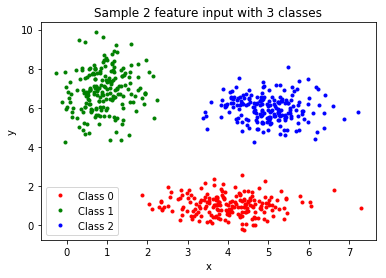

In [11]:
colors = ['r', 'g', 'b']

# Define three cluster centers
centers = [[4, 1],
           [1, 7],
           [5, 6]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.5],
          [0.5, 1.1],
          [0.7, 0.7]]

# seeded for reproducibility
np.random.seed(2)  

# Initial varables
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)

# Zip object is an iterator of tuples, enumerate returns centers: sigmas pair
# Total of 200 sample points, in 3 clusters
for i, ((x_center, y_center), (x_sigma, y_sigma)) in enumerate(zip(centers, sigmas)):
    # Create row array x or y value of each point
    xpts = np.hstack((xpts, np.random.standard_normal(200) * x_sigma + x_center))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * y_sigma + y_center))
    labels = np.hstack((labels, np.ones(200) * i))


# Remove the extra 0 at front 
xpts = np.delete(xpts,0)
ypts = np.delete(ypts,0)
labels = np.delete(labels,0)

# Visualize the test data
for j in range(3):
    plt.plot(xpts[j == labels],ypts[j==labels],'.', color = colors[j], label = 'Class %s'%j)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Sample 2 feature input with 3 classes')
plt.legend(loc='lower left')
plt.show()
xy = np.vstack((xpts,ypts))

In [ ]:
ass = np.zeros(1)
ass = np.hstack((ass,1))
print(ass)

In [ ]:
## Single Class SVM

In [ ]:
# Prep simple data in format of hand features
X = xy.transpose()
b = labels.transpose()

# model parameters
num_samples = len(b)
X_svm = np.hstack((X, np.ones((num_samples, 1))))
num_features = len(X[0])
w_k = np.zeros((num_features+1, 1))

r = 0 # regularizer (aka lambda)
U, s, V = np.linalg.svd(X_svm)
tau = 1/s[0]**2 # max stepsize

# loop through each class
classes = [0,1,2]
b_classes = np.zeros((len(b),len(classes)))
b_test_svm = np.zeros(b_classes.shape)
b_test_ls = np.zeros(b_classes.shape)
w_svm = np.zeros((len(w_k),len(classes)))
w_ls = np.zeros((len(w_k),len(classes)))

for c in classes:
    # form binary labels
    b_svm = np.where(b == c, 1, -1)
    b_classes[:,c] = b_svm.reshape(len(b_svm))
    
    # train svm
    num_steps = 10
    counter = 0
    counter2 = 0
    for i in range(num_steps):
        # loop through training samples
        l_hinge = np.zeros(w_k.shape)
        for s in range(num_samples):
            # indicator function
            counter2 +=1
            if b_svm[s]*X_svm[s]@w_k <= 1:
                counter +=1
                l_hinge = np.add(l_hinge, -b_svm[s]*X_svm[s].reshape(l_hinge.shape))
        w_k = w_k - tau*(l_hinge+2*r*w_k)
        
    # save weights
    w_svm[:,c] = w_k.reshape(len(w_k)) # svm
    w_k_ls = np.linalg.inv(X_svm.T@X_svm)@X_svm.T@b_svm # least squares
    w_ls[:,c] = w_k_ls.reshape(len(w_k_ls))
#     print("Weights for class {}:".format(c))
#     print(w_k)

# test svm against known training data
header = ["class", "  svm  ", "least squares"]
data = []
for c in classes:
    b_hat_svm = X_svm@w_svm[:,c]
    b_hat_ls = X_svm@w_ls[:,c]
    b_test_svm[:,c] = b_hat_svm.reshape(len(b))
    b_test_ls[:,c] = b_hat_ls.reshape(len(b))

    # find percent incorrect
    num_incorrect_ls = np.sum(np.sign(b_test_ls[:,c]) != b_classes[:,c])
    percent_incorrect_ls = num_incorrect_ls/len(b)*100
    num_incorrect_svm = np.sum(np.sign(b_test_svm[:,c]) != b_classes[:,c])
    percent_incorrect_svm = num_incorrect_svm/len(b)*100
    data.append([c,"{:0.2f} %".format(percent_incorrect_svm), "{:0.2f} %".format(percent_incorrect_ls)])

# print table
printTable(header,data)

In [ ]:
# plot
fig,ax = plt.subplots(3,2)
plt.rcParams['figure.figsize'] = [20, 10] # matplotlib window size = [width, height]

for c in classes:
    if c < 3:
        count2 = 0
    else:
        count2 = 1
    ax[c%3][count2].set_title("Class {}".format(c),fontsize=15)
    ax[c%3][count2].scatter(range(len(b_classes[:,c])), b_classes[:,c], label="true", color="C0", s=15)
    ax[c%3][count2].plot(range(len(b_classes[:,c])), b_classes[:,c], alpha=0.5, color="C0")
    ax[c%3][count2].scatter(range(len(b_classes[:,c])), b_test_svm[:,c], label="svm estimate", color="C1", s=15)
    ax[c%3][count2].plot(range(len(b_classes[:,c])), b_test_svm[:,c], alpha=0.5, color="C1")
    ax[c%3][count2].scatter(range(len(b_classes[:,c])), b_test_ls[:,c], label="ls estimate", color="C2", s=15)
    ax[c%3][count2].plot(range(len(b_classes[:,c])), b_test_ls[:,c], alpha=0.5, color="C2")
    ax[c%3][count2].plot([0,len(b_classes[:,c])], [0,0], alpha=0.5, linestyle="--", color="k", label="zero")

ax[0][1].legend(bbox_to_anchor=(0.4, 1.3), loc='right', ncol=1,fontsize=12) # legend
title = fig.suptitle("One vs. All with SVM, LS",fontsize=20) # title
fig.tight_layout() # prevent overlapping
plt.show()